In [25]:
import pandas as pd
import numpy as np


In [26]:
df = pd.read_csv('/content/GoogleStock Price.csv')

In [27]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2167,2021-08-11,137.181503,137.682495,136.271500,136.279007,136.279007,15352000
1814,2020-03-18,52.997002,55.249500,51.849998,54.559502,54.559502,93044000
1743,2019-12-04,65.305000,66.213501,65.152496,65.946999,65.946999,35506000
1216,2017-10-30,51.458000,51.991501,51.116501,51.656502,51.656502,46804000
98,2013-05-23,21.946947,22.271271,21.871872,22.091843,22.091843,90912996


In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [29]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2640,2023-06-29,119.239998,120.059998,118.300003,119.099998,119.099998,24090900
2641,2023-06-30,120.169998,121.080002,119.690002,119.699997,119.699997,29519700
2642,2023-07-03,119.239998,120.190002,118.820000,119.900002,119.900002,14467900
2643,2023-07-05,119.239998,122.610001,119.230003,121.750000,121.750000,27584800
2644,2023-07-06,119.800003,120.300003,118.400002,120.110001,120.110001,24745200


In [30]:
df1 = df.reset_index()['Close']

In [31]:
df1.shape

(2645,)

In [32]:
df1

,Close
0,18.099348
1,18.109859
2,18.467718
3,18.387136
4,18.350851
...,...
2640,119.099998
2641,119.699997
2642,119.900002
2643,121.750000


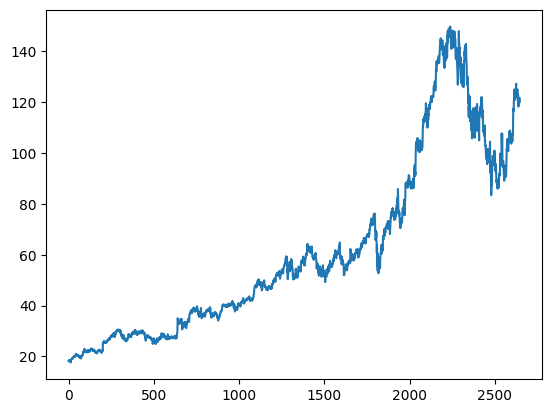

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [35]:
df1.shape

(2645, 1)

In [36]:
df1

array([[0.00385643],
       [0.00393591],
       [0.00664186],
       ...,
       [0.7736205 ],
       [0.78760923],
       [0.7752084 ]])

In [37]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size], df1[training_size:len(df1),:1]
print(len(train_data))
print(len(test_data))

1719
926


In [38]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)


In [39]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
print(X_train.shape), print(y_train.shape)

(1618, 100)
(1618,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(825, 100)
(825,)


(None, None)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0135 - val_loss: 0.0151
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 3.6942e-04 - val_loss: 0.0026
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 1.6230e-04 - val_loss: 0.0040
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - loss: 1.5659e-04 - val_loss: 0.0042
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - loss: 1.5658e-04 - val_loss: 0.0060
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - loss: 1.6746e-04 - val_loss: 0.0041
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - loss: 1.4603e-04 - val_loss: 0.0051
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 1.6144e-04 - val_loss: 0.0041
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 1.5141e-04 - val_loss: 0.0050
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - loss: 1.4233e-04 - val_loss: 0.0049
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - loss: 1.4588e-04 - val_loss: 0.005

In [47]:
import tensorflow as tf

In [48]:
tf.__version__

'2.17.1'

In [49]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [50]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

42.37034775888322

In [52]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


102.41319746676302

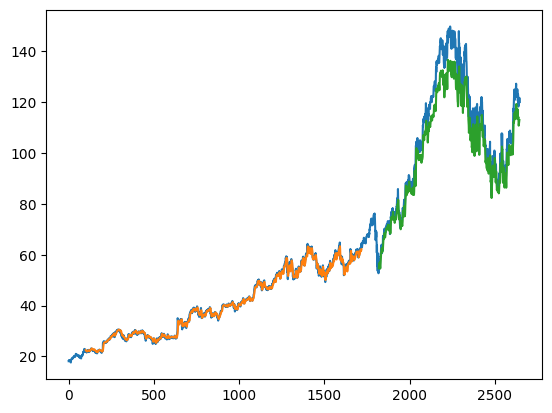

In [54]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test_data)

926

In [56]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 585)

In [57]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.6368294637371357,
 0.6611585310389028,
 0.6420506563563521,
 0.6437293068489655,
 0.6548636205363775,
 0.6542322084241481,
 0.6312150591529164,
 0.6333398229268334,
 0.6347500439486196,
 0.6387727361903516,
 0.6354457222182746,
 0.6354192427153496,
 0.6324967478598512,
 0.6404589440138649,
 0.6407160663331163,
 0.6467841415295394,
 0.6722134062175402,
 0.7059300630464562,
 0.7022627384256773,
 0.7135180270970407,
 0.7178280709816248,
 0.725480301189635,
 0.7156314837193821,
 0.719340344815337,
 0.7146068596421498,
 0.7309925952723791,
 0.7300474097039217,
 0.7326977252679171,
 0.7286334388614598,
 0.7283839315626575,
 0.7186182447323061,
 0.7365427336991726,
 0.7403234759730024,
 0.7331590109005701,
 0.758890741893223,
 0.7716393822262739,
 0.7567962074429065,
 0.752856645841076,
 0.739151455098443,
 0.7421533884627162,
 0.7506902879024339,
 0.7562025819851778,
 0.7334501123640977,
 0.7252496583733085,
 0.6988562859448256,
 0.7097410923334354,
 0.7283952387142333,
 0.732380144301464

In [60]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        # The problem is here. Change the reshape to fit the data
        # x_input = x_input.reshape((1, n_steps, 1))
        x_input = x_input.reshape((1, x_input.shape[1], 1)) # Reshape to match the input data size.
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.66115853 0.64205066 0.64372931 0.65486362 0.65423221 0.63121506
 0.63333982 0.63475004 0.63877274 0.63544572 0.63541924 0.63249675
 0.64045894 0.64071607 0.64678414 0.67221341 0.70593006 0.70226274
 0.71351803 0.71782807 0.7254803  0.71563148 0.71934034 0.71460686
 0.7309926  0.73004741 0.73269773 0.72863344 0.72838393 0.71861824
 0.73654273 0.74032348 0.73315901 0.75889074 0.77163938 0.75679621
 0.75285665 0.73915146 0.74215339 0.75069029 0.75620258 0.73345011
 0.72524966 0.69885629 0.70974109 0.72839524 0.73238014 0.72238006
 0.72579407 0.73919686 0.7343499  0.75964688 0.76033875 0.76693238
 0.76026693 0.75806272 0.76726126 0.76325749 0.75455797 0.7719456
 0.77524619 0.77378682 0.77737857 0.78765839 0.78579449 0.79286827
 0.78511018 0.78021788 0.78756008 0.77521596 0.78808183 0.79199866
 0.79045991 0.79328035 0.79334461 0.79355258 0.7915601  0.79017636
 0.79286071 0.81413114 0.82118224 0.82332968 0.81251675 0.8161047
 0.82712179 0.82988927 0.83666058 0.82734481 0.82708

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
import matplotlib.pyplot as plt

In [63]:
len(df1)

2645

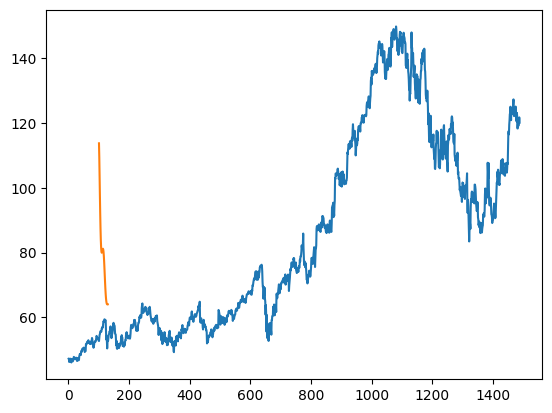

In [71]:
import matplotlib.pyplot as plt

# Ensure day_new and the data to be plotted have the same length
day_new = np.arange(1, len(df1[1158:]) + 1)  # Adjust day_new to match data length

# Now plot the data
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.show()

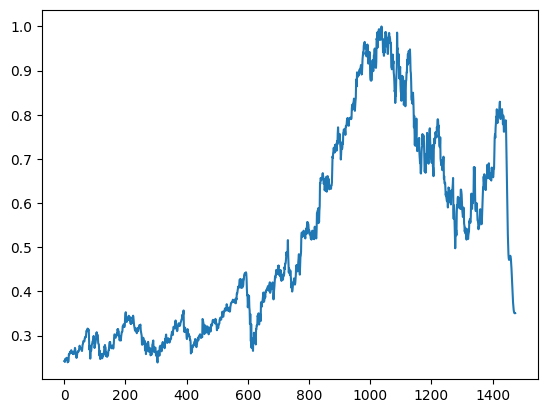

In [68]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [69]:
df3=scaler.inverse_transform(df3).tolist()

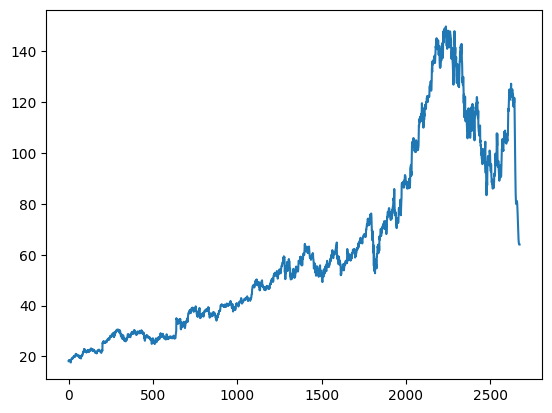

In [70]:
plt.plot(df3)